# Initial Data Exploration for Retail Analytics

This notebook performs an initial exploratory data analysis on our retail dataset, examining the main entities:
- Customers
- Products
- Transactions
- Transaction Items

The goal is to understand the data structure, identify patterns, and gain insights for feature engineering.

In [1]:
# Import libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import glob

# Configure plot settings
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

# Add project root to path for importing custom modules
sys.path.append(os.path.abspath('../..'))

# Configure pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Loading Data

First, let's load the retail datasets. We'll support both real data from external sources and simulated data.

In [2]:
def load_latest_data(data_dir, entity_name, file_pattern='*_{}_*.csv'):
    """
    Load the latest data file for a given entity.
    
    Args:
        data_dir: Directory containing data files
        entity_name: Name of the entity (e.g., 'customers', 'products')
        file_pattern: Pattern to match files, with {} placeholder for entity_name
        
    Returns:
        Latest DataFrame for the entity
    """
    pattern = file_pattern.format(entity_name)
    files = glob.glob(os.path.join(data_dir, pattern))
    
    if not files:
        print(f"No files found for {entity_name} in {data_dir} with pattern {pattern}")
        return None
    
    # Sort files by timestamp (assuming filenames contain timestamp)
    latest_file = sorted(files)[-1]
    print(f"Loading {entity_name} data from {os.path.basename(latest_file)}")
    
    # Read data based on file extension
    file_ext = os.path.splitext(latest_file)[1].lower()
    
    if file_ext == '.csv':
        return pd.read_csv(latest_file)
    elif file_ext == '.json':
        return pd.read_json(latest_file, lines=True)
    elif file_ext == '.parquet':
        return pd.read_parquet(latest_file)
    else:
        print(f"Unsupported file extension: {file_ext}")
        return None

In [3]:
# Load data from simulated data directory
DATA_DIR = '../../data/simulated'

entities = ['customers', 'products', 'locations', 'transactions', 'transaction_items']
data = {}

for entity in entities:
    data[entity] = load_latest_data(DATA_DIR, entity)
    
# Check which entities were loaded
for entity, df in data.items():
    if df is not None:
        print(f"{entity}: {len(df)} records")

Loading customers data from retail_customers_20250409_183954.csv
Loading products data from retail_products_20250409_183954.csv
Loading locations data from retail_locations_20250409_183954.csv
Loading transactions data from retail_transactions_20250409_183954.csv
Loading transaction_items data from retail_transaction_items_20250409_183954.csv
customers: 5000 records
products: 1000 records
locations: 200 records
transactions: 32569 records
transaction_items: 116732 records


## Data Overview

Let's examine the structure and content of each dataset.

In [4]:
def analyze_dataframe(df, name):
    """
    Print analysis of a DataFrame.
    
    Args:
        df: DataFrame to analyze
        name: Name of the dataset
    """
    print(f"\n{'='*50}")
    print(f"Analysis of {name} dataset")
    print(f"{'='*50}")
    
    print(f"\nShape: {df.shape}")
    print("\nColumn Data Types:")
    print(df.dtypes)
    
    print("\nSample Records:")
    display(df.head())
    
    print("\nSummary Statistics:")
    display(df.describe(include='all').T)
    
    print("\nMissing Values:")
    missing = df.isnull().sum()
    print(missing[missing > 0] if any(missing > 0) else "No missing values")
    
    print("\nUnique Values in Each Column:")
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() < 20:
            print(f"{col}: {df[col].nunique()} unique values")
            if df[col].nunique() < 10:
                print(f"  Values: {sorted(df[col].unique())}")

In [5]:
# Analyze each dataset
for entity, df in data.items():
    if df is not None:
        analyze_dataframe(df, entity)


Analysis of customers dataset

Shape: (5000, 9)

Column Data Types:
customer_id      int64
customer_key    object
first_name      object
last_name       object
email           object
phone           object
created_at      object
updated_at      object
is_active         bool
dtype: object

Sample Records:


,customer_id,customer_key,first_name,last_name,email,phone,created_at,updated_at,is_active
0,1,a6d382db-8ecd-4188-803f-261ef1a95a9e,Lisa,Sanchez,uwilson@example.net,333-667-2877,2023-05-15 03:59:28.167557,2023-10-17 18:28:19.544598,True
1,2,7b1bcecb-a707-41a2-8f73-2f98beb5b5af,William,Choi,nathan08@example.com,598.282.2505,2023-10-06 18:51:46.079369,2023-12-26 14:12:26.283835,True
2,3,430c6d89-cfc7-41c7-a5eb-3b97f0db2822,Michael,Newton,mannbrent@example.com,(735)938-3194,2023-07-11 02:10:31.721502,2023-12-10 21:48:17.982552,True
3,4,89eb2aa4-bfd2-41bc-ad6a-54218c35288e,Angela,Gonzalez,natalie28@example.net,595.567.2210x33660,2023-07-28 11:49:36.310579,2023-09-25 23:51:06.955755,True
4,5,a7bd34a7-6231-410d-97c7-716091bcd7bf,Suzanne,Thompson,marksross@example.org,(613)473-2700x500,2023-03-08 02:20:08.525500,2023-12-10 03:38:10.190570,True



Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,5000.0,NaN,NaN,NaN,2500.5,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
customer_key,5000,5000,a6d382db-8ecd-4188-803f-261ef1a95a9e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_name,5000,605,Michael,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_name,5000,917,Smith,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email,5000,4940,thomas21@example.org,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone,5000,5000,333-667-2877,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,5000,5000,2023-05-15 03:59:28.167557,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
updated_at,5000,5000,2023-10-17 18:28:19.544598,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_active,5000,2,True,4223,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing Values:
No missing values

Unique Values in Each Column:
customer_key: 5000 unique values
first_name: 605 unique values
last_name: 917 unique values
email: 4940 unique values
phone: 5000 unique values
created_at: 5000 unique values
updated_at: 5000 unique values
is_active: 2 unique values
  Values: [False, True]

Analysis of products dataset

Shape: (1000, 13)

Column Data Types:
product_id        int64
product_key      object
product_name     object
description      object
category         object
subcategory      object
brand            object
supplier         object
unit_price      float64
cost_price      float64
created_at       object
updated_at       object
is_active          bool
dtype: object

Sample Records:


,product_id,product_key,product_name,description,category,subcategory,brand,supplier,unit_price,cost_price,created_at,updated_at,is_active
0,1,6bb2b51b-924f-4ae7-81f7-750ff4768170,Smith Inc thousand Lite,Team sound who by provide others information. ...,recently,recently hope,Smith Inc,Russell Ltd,431.95,277.84,2023-11-23 23:23:02.825764,2023-12-20 12:49:49.018797,True
1,2,baeb1221-d458-4cac-932f-b84e140888ee,Gibson-Thompson rule Max,Make make prevent thousand population amount w...,practice,practice read,Gibson-Thompson,"Hancock, Dominguez and Lopez",368.27,242.07,2023-05-01 06:27:25.556803,2023-09-30 22:24:11.619374,True
2,3,1212de9a-f566-47d8-b015-5e9e72d5f6f6,"Kim, Garrett and Smith long Ultra",Activity kid hope throw doctor large.\nRight u...,create,create sense,"Kim, Garrett and Smith","Butler, Brown and Rodriguez",116.74,50.47,2023-08-18 08:20:57.195718,2023-11-24 14:28:06.090943,True
3,4,3d787854-4816-47fb-a09f-deba0ce991e1,Mitchell and Sons be Ultra,Third begin bar that prepare. City seven forwa...,could,could American,Mitchell and Sons,Moore and Sons,829.76,400.03,2023-12-02 10:32:36.686079,2023-12-02 15:21:57.725980,True
4,5,9a85136a-9ed6-44b5-be9c-a379130518da,Hobbs LLC letter Ultra,Apply result right west four she result year. ...,practice,practice read,Hobbs LLC,Thornton-Flores,526.89,342.98,2023-01-09 01:01:22.154977,2023-01-11 02:01:34.091704,True



Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
product_key,1000,1000,6bb2b51b-924f-4ae7-81f7-750ff4768170,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,1000,1000,Smith Inc thousand Lite,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,1000,1000,Team sound who by provide others information. ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1000,29,major,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subcategory,1000,61,major recent,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,1000,100,Hobbs LLC,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
supplier,1000,974,Williams LLC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_price,1000.0,NaN,NaN,NaN,497.48599,291.367854,6.34,238.6775,495.47,749.87,997.51
cost_price,1000.0,NaN,NaN,NaN,273.56789,167.211772,3.1,129.8825,267.61,407.06,676.85



Missing Values:
No missing values

Unique Values in Each Column:
product_key: 1000 unique values
product_name: 1000 unique values
description: 1000 unique values
category: 29 unique values
subcategory: 61 unique values
brand: 100 unique values
supplier: 974 unique values
created_at: 1000 unique values
updated_at: 1000 unique values
is_active: 2 unique values
  Values: [False, True]

Analysis of locations dataset

Shape: (200, 8)

Column Data Types:
location_id     int64
country        object
region         object
state          object
city           object
postal_code     int64
created_at     object
updated_at     object
dtype: object

Sample Records:


,location_id,country,region,state,city,postal_code,created_at,updated_at
0,1,Yemen,Georgia,KY,Port Michaelfort,93033,2023-05-24 06:00:57.167289,2023-05-31 10:35:06.035958
1,2,United States Minor Outlying Islands,Rhode Island,MT,Webbview,94475,2023-06-19 23:31:46.315983,2023-10-31 10:29:23.075297
2,3,South Africa,Indiana,GA,Janiceland,82849,2023-07-24 19:31:00.426894,2023-12-16 12:52:50.337350
3,4,Greenland,Oklahoma,GU,Port Melindaport,16305,2023-08-28 12:03:50.702505,2023-09-15 14:53:08.889576
4,5,Algeria,New Jersey,SD,New Scottmouth,68815,2023-07-26 14:13:37.919845,2023-08-20 06:23:09.239750



Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
location_id,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
country,200,136,Norway,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,200,50,Kansas,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,200,57,MT,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,200,197,Jamestown,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postal_code,200.0,NaN,NaN,NaN,50512.185,29534.950536,869.0,22583.75,50862.0,75967.5,99135.0
created_at,200,200,2023-05-24 06:00:57.167289,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
updated_at,200,200,2023-05-31 10:35:06.035958,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing Values:
No missing values

Unique Values in Each Column:
country: 136 unique values
region: 50 unique values
state: 57 unique values
city: 197 unique values
created_at: 200 unique values
updated_at: 200 unique values

Analysis of transactions dataset

Shape: (32569, 14)

Column Data Types:
transaction_id        int64
transaction_key      object
customer_id           int64
date_id               int64
location_id           int64
total_amount        float64
discount_amount     float64
tax_amount          float64
shipping_amount     float64
payment_method       object
channel              object
transaction_time     object
is_return              bool
created_at           object
dtype: object

Sample Records:


,transaction_id,transaction_key,customer_id,date_id,location_id,total_amount,discount_amount,tax_amount,shipping_amount,payment_method,channel,transaction_time,is_return,created_at
0,1,a5015513-0be0-4658-afa5-8cee392f0d5c,1,20231220,34,1389.14,324.30,100.71,3.736027,apple_pay,web,11:22:24.464608,False,2023-12-20 11:22:24.464608
1,2,7bfdbd57-0d64-48c2-a204-21cca87c2863,1,20230819,132,3426.02,639.82,248.38,0.614213,debit_card,in_store,18:39:16.930910,False,2023-08-19 18:39:16.930910
2,3,674b83cc-8553-47bd-8c34-9888937a7b6b,1,20230831,28,4858.42,781.07,352.23,13.154906,credit_card,mobile_app,22:01:07.122077,False,2023-08-31 22:01:07.122077
3,4,c04faadf-6571-4901-92c8-026c40c9c657,1,20230903,152,5282.90,467.30,383.01,11.662227,credit_card,phone,02:16:20.641004,False,2023-09-03 02:16:20.641004
4,5,ff0ad90a-8492-4a42-a3e5-07612d2b84d2,1,20231111,53,2054.36,752.92,148.94,1.515946,google_pay,mobile_app,09:21:30.410999,False,2023-11-11 09:21:30.410999



Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transaction_id,32569.0,NaN,NaN,NaN,16285.0,9402.004795,1.0,8143.0,16285.0,24427.0,32569.0
transaction_key,32569,32569,a5015513-0be0-4658-afa5-8cee392f0d5c,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,32569.0,NaN,NaN,NaN,2516.349903,1443.436732,1.0,1262.0,2537.0,3766.0,4999.0
date_id,32569.0,NaN,NaN,NaN,20230967.440357,259.485846,20230103.0,20230815.0,20231025.0,20231207.0,20231230.0
location_id,32569.0,NaN,NaN,NaN,100.691117,57.476798,1.0,51.0,100.0,150.0,200.0
total_amount,32569.0,NaN,NaN,NaN,3241.068072,2131.32195,6.34,1574.14,2930.53,4549.8,14305.29
discount_amount,32569.0,NaN,NaN,NaN,320.295533,367.948322,0.0,10.42,196.45,498.91,3056.55
tax_amount,32569.0,NaN,NaN,NaN,234.977484,154.520896,0.46,114.13,212.46,329.86,1037.14
shipping_amount,32569.0,NaN,NaN,NaN,7.061007,4.522335,0.0,3.10914,6.963635,11.006764,14.999707
payment_method,32569,5,debit_card,6623,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing Values:
No missing values

Unique Values in Each Column:
transaction_key: 32569 unique values
payment_method: 5 unique values
  Values: ['apple_pay', 'credit_card', 'debit_card', 'google_pay', 'paypal']
channel: 4 unique values
  Values: ['in_store', 'mobile_app', 'phone', 'web']
transaction_time: 32569 unique values
is_return: 2 unique values
  Values: [False, True]
created_at: 32569 unique values

Analysis of transaction_items dataset

Shape: (116732, 9)

Column Data Types:
transaction_item_id      int64
transaction_id           int64
product_id               int64
quantity                 int64
unit_price             float64
discount_amount        float64
tax_amount             float64
line_total             float64
created_at              object
dtype: object

Sample Records:


,transaction_item_id,transaction_id,product_id,quantity,unit_price,discount_amount,tax_amount,line_total,created_at
0,1,1,468,2,856.72,324.30,100.71,1389.14,2023-12-20 11:22:24.464608
1,2,2,399,2,767.40,186.60,97.74,1348.20,2023-08-19 18:39:16.930910
2,3,2,107,3,843.68,453.22,150.64,2077.82,2023-08-19 18:39:16.930910
3,4,3,173,3,937.84,781.07,147.35,2032.45,2023-08-31 22:01:07.122077
4,5,3,236,1,568.23,0.00,41.20,568.23,2023-08-31 22:01:07.122077



Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transaction_item_id,116732.0,NaN,NaN,NaN,58366.5,33697.770149,1.0,29183.75,58366.5,87549.25,116732.0
transaction_id,116732.0,NaN,NaN,NaN,16306.095329,9429.917131,1.0,8116.0,16352.0,24498.0,32569.0
product_id,116732.0,NaN,NaN,NaN,499.929205,288.912559,1.0,249.0,500.0,750.0,1000.0
quantity,116732.0,NaN,NaN,NaN,1.999991,0.816194,1.0,1.0,2.0,3.0,3.0
unit_price,116732.0,NaN,NaN,NaN,496.346922,291.136807,6.34,237.95,494.45,749.62,997.51
discount_amount,116732.0,NaN,NaN,NaN,89.364572,173.18694,0.0,0.0,0.0,106.545,1183.87
tax_amount,116732.0,NaN,NaN,NaN,65.560272,50.724941,0.28,25.61,52.4,96.93,216.96
line_total,116732.0,NaN,NaN,NaN,904.279427,699.654193,3.87,353.24,722.8,1337.0,2992.53
created_at,116732,32569,2023-04-04 19:38:29.099645,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing Values:
No missing values

Unique Values in Each Column:
quantity: 3 unique values
  Values: [1, 2, 3]
created_at: 32569 unique values


## Customer Analysis

Let's analyze the customer data to understand the customer base.

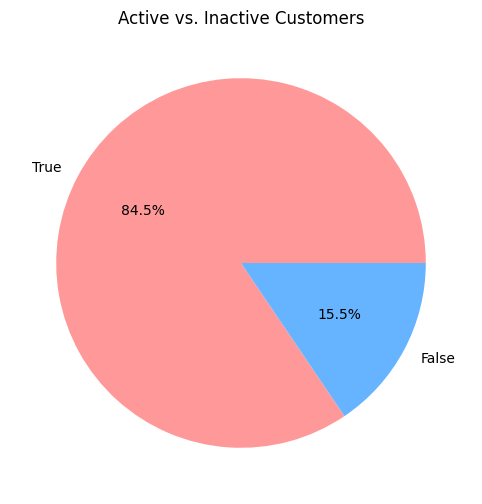

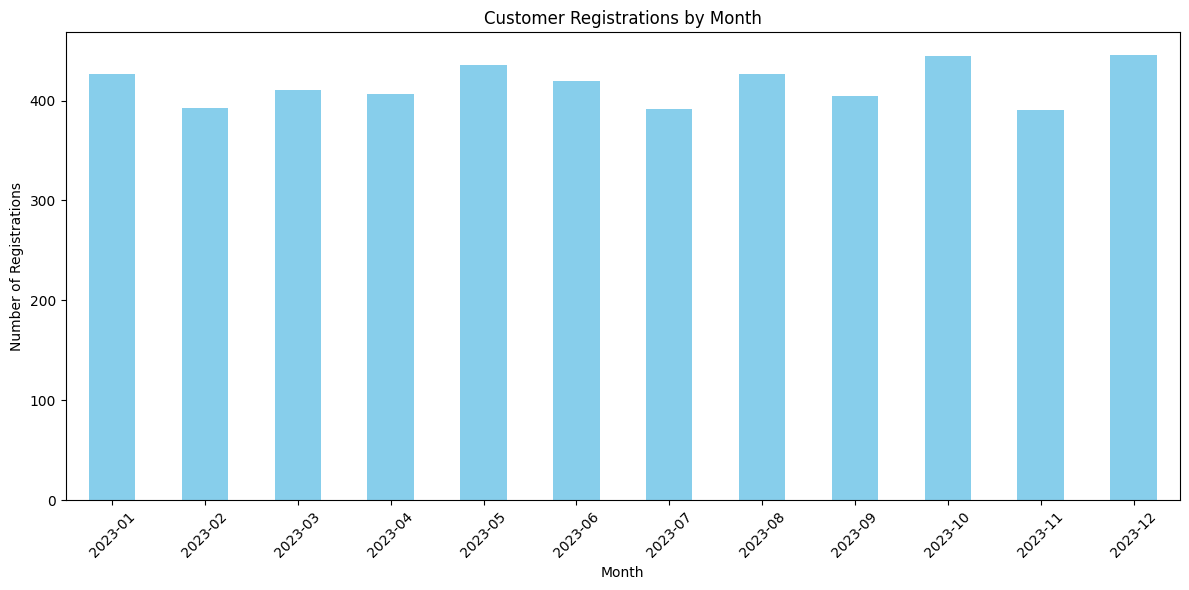

In [6]:
if 'customers' in data and data['customers'] is not None:
    customers_df = data['customers']
    
    # Active vs. Inactive customers
    if 'is_active' in customers_df.columns:
        activity_counts = customers_df['is_active'].value_counts()
        plt.figure(figsize=(8, 6))
        ax = activity_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
        ax.set_ylabel('')
        plt.title('Active vs. Inactive Customers')
        plt.show()
    
    # Customer creation date analysis
    if 'created_at' in customers_df.columns:
        try:
            # Convert to datetime if not already
            if not pd.api.types.is_datetime64_any_dtype(customers_df['created_at']):
                customers_df['created_at'] = pd.to_datetime(customers_df['created_at'])
            
            # Create month-year field
            customers_df['registration_month'] = customers_df['created_at'].dt.to_period('M')
            
            # Plot customer registrations by month
            monthly_registrations = customers_df.groupby('registration_month').size()
            
            plt.figure(figsize=(12, 6))
            monthly_registrations.plot(kind='bar', color='skyblue')
            plt.title('Customer Registrations by Month')
            plt.xlabel('Month')
            plt.ylabel('Number of Registrations')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error analyzing customer creation dates: {e}")
else:
    print("No customer data available for analysis.")

## Product Analysis

Let's analyze the product data to understand the product catalog.

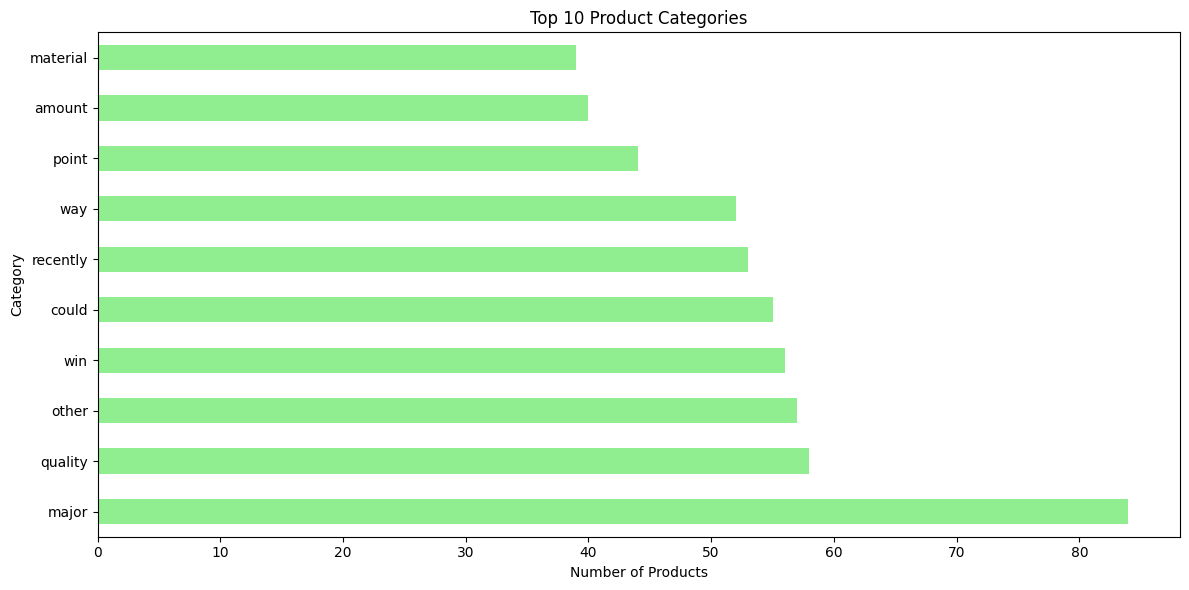

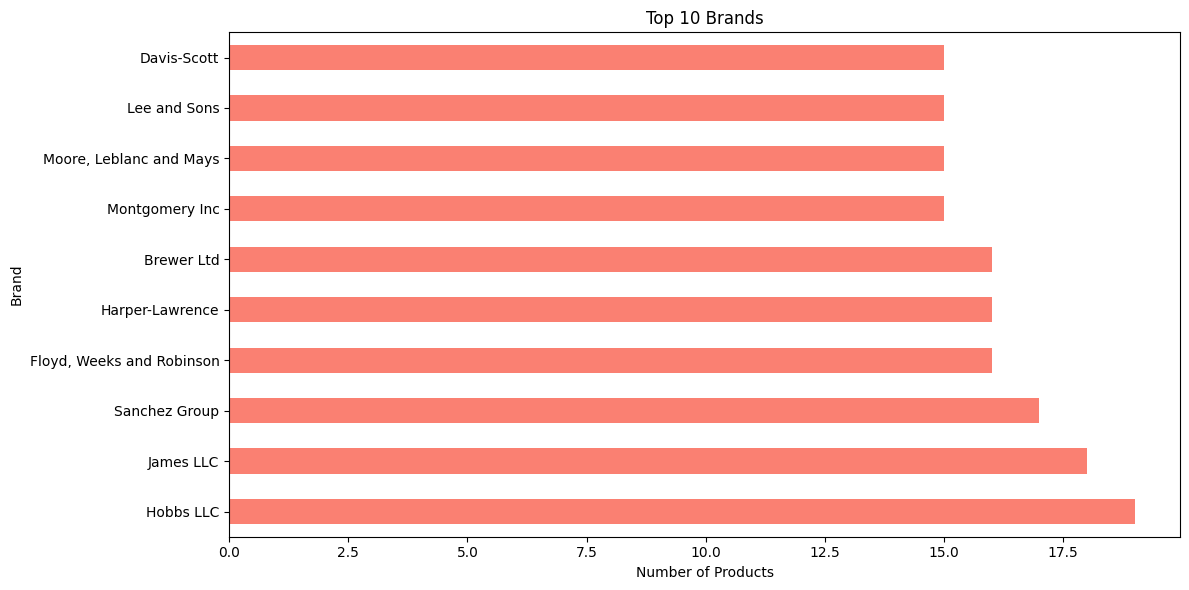

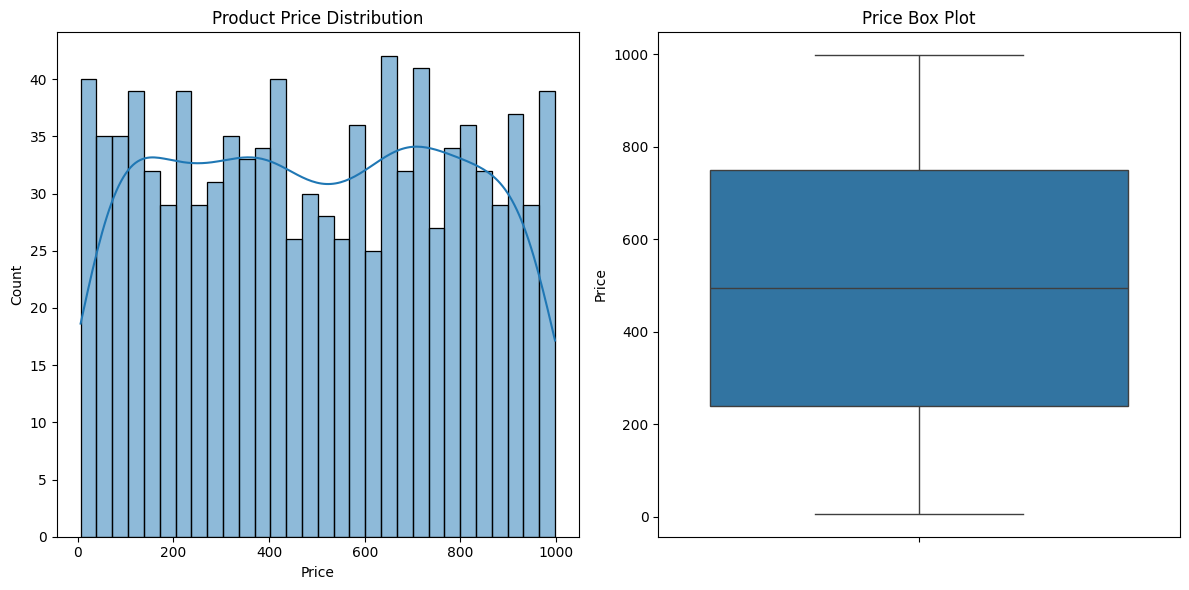

Price Statistics:
count    1000.000000
mean      497.485990
std       291.367854
min         6.340000
25%       238.677500
50%       495.470000
75%       749.870000
max       997.510000
Name: unit_price, dtype: float64


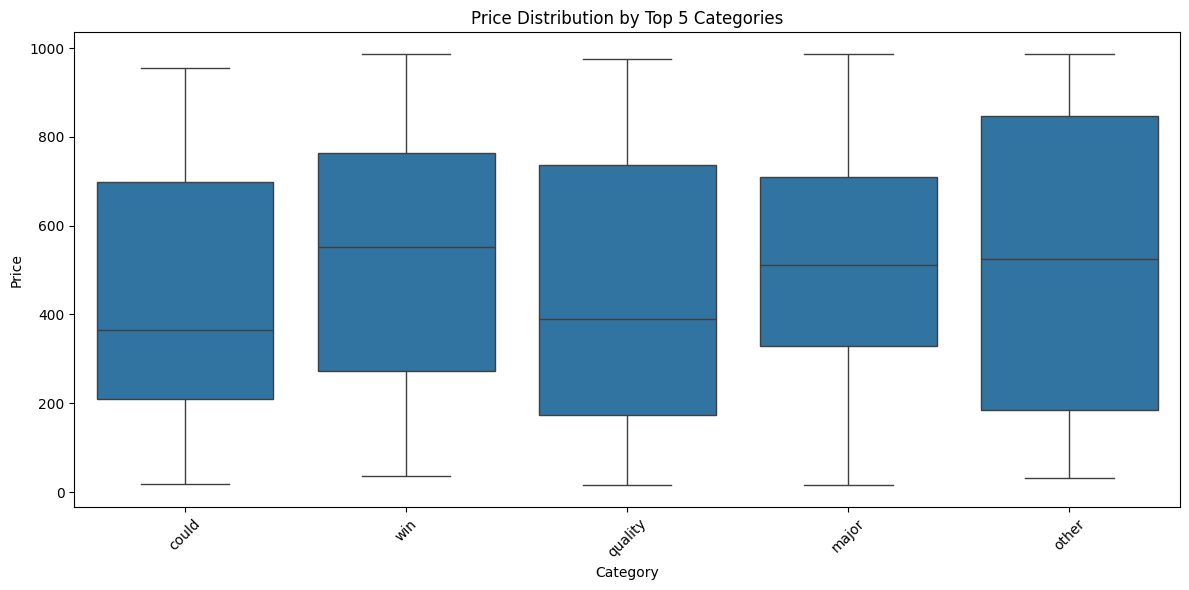

In [7]:
if 'products' in data and data['products'] is not None:
    products_df = data['products']
    
    # Product categories distribution
    if 'category' in products_df.columns:
        category_counts = products_df['category'].value_counts().head(10)
        
        plt.figure(figsize=(12, 6))
        ax = category_counts.plot(kind='barh', color='lightgreen')
        plt.title('Top 10 Product Categories')
        plt.xlabel('Number of Products')
        plt.ylabel('Category')
        plt.tight_layout()
        plt.show()
    
    # Brand distribution
    if 'brand' in products_df.columns:
        brand_counts = products_df['brand'].value_counts().head(10)
        
        plt.figure(figsize=(12, 6))
        ax = brand_counts.plot(kind='barh', color='salmon')
        plt.title('Top 10 Brands')
        plt.xlabel('Number of Products')
        plt.ylabel('Brand')
        plt.tight_layout()
        plt.show()
    
    # Price distribution
    if 'unit_price' in products_df.columns:
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(products_df['unit_price'], bins=30, kde=True)
        plt.title('Product Price Distribution')
        plt.xlabel('Price')
        
        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=products_df['unit_price'])
        plt.title('Price Box Plot')
        plt.ylabel('Price')
        
        plt.tight_layout()
        plt.show()
        
        # Price statistics
        price_stats = products_df['unit_price'].describe()
        print("Price Statistics:")
        print(price_stats)
        
        # Price by category
        if 'category' in products_df.columns:
            top_categories = products_df['category'].value_counts().head(5).index
            category_prices = products_df[products_df['category'].isin(top_categories)]
            
            plt.figure(figsize=(12, 6))
            sns.boxplot(x='category', y='unit_price', data=category_prices)
            plt.title('Price Distribution by Top 5 Categories')
            plt.xlabel('Category')
            plt.ylabel('Price')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
else:
    print("No product data available for analysis.")

## Transaction Analysis

Let's analyze the transactions to understand purchasing patterns.

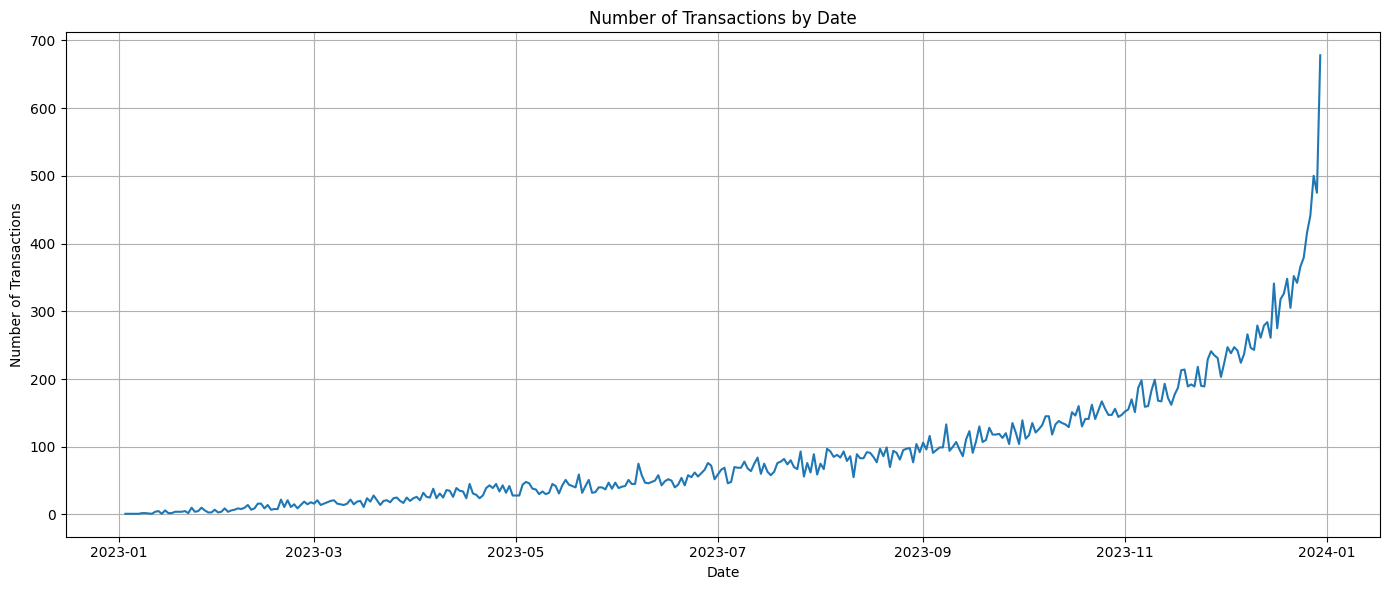

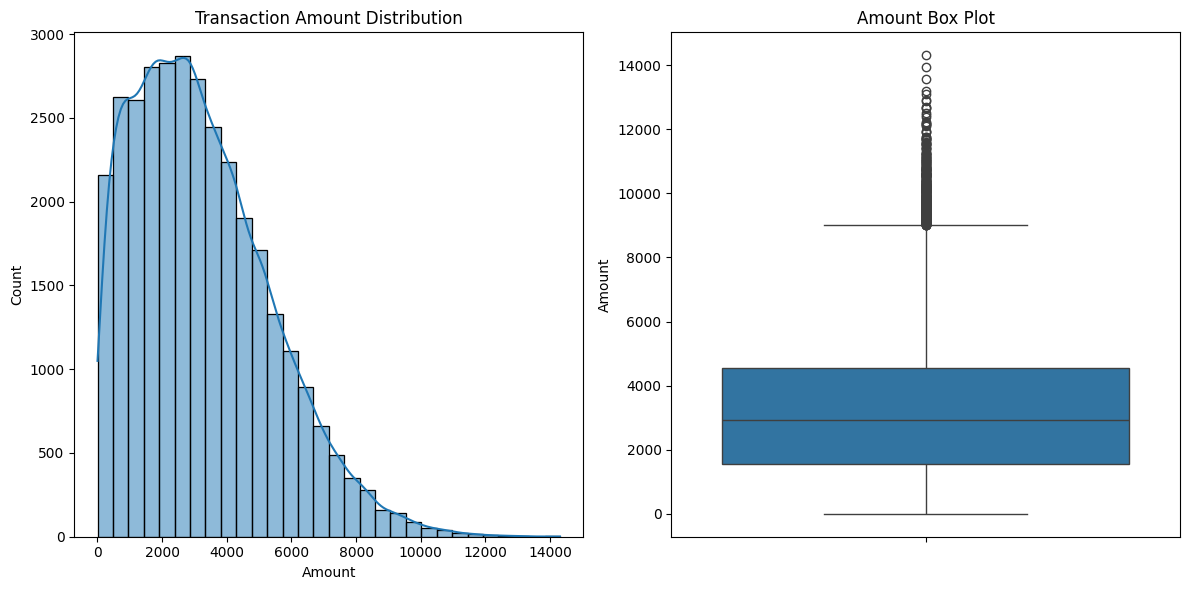

Transaction Amount Statistics:
count    32569.000000
mean      3241.068072
std       2131.321950
min          6.340000
25%       1574.140000
50%       2930.530000
75%       4549.800000
max      14305.290000
Name: total_amount, dtype: float64


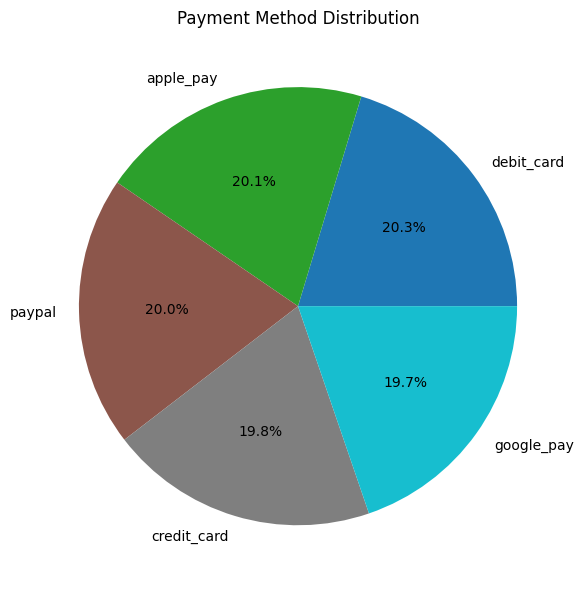

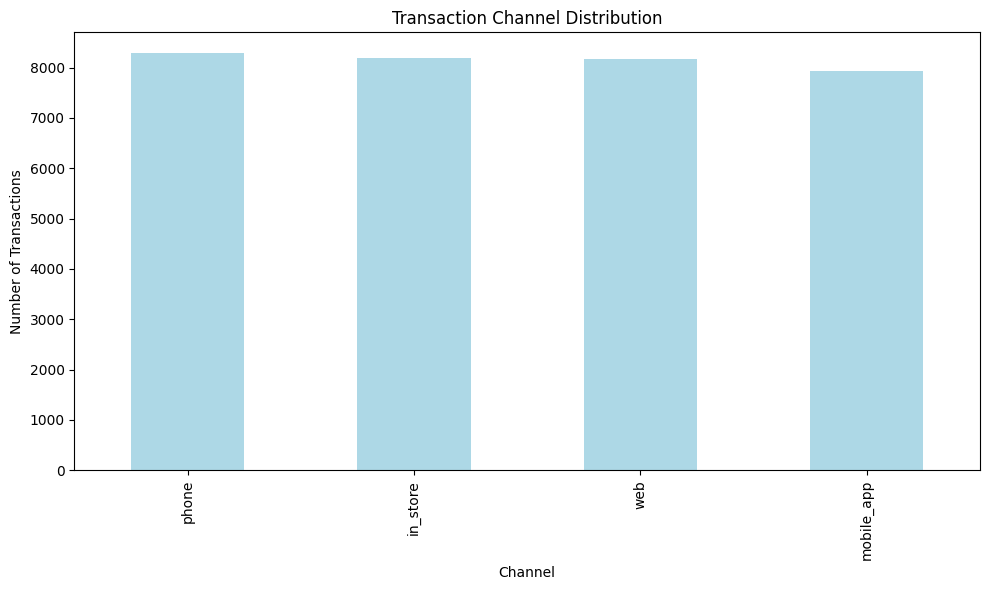

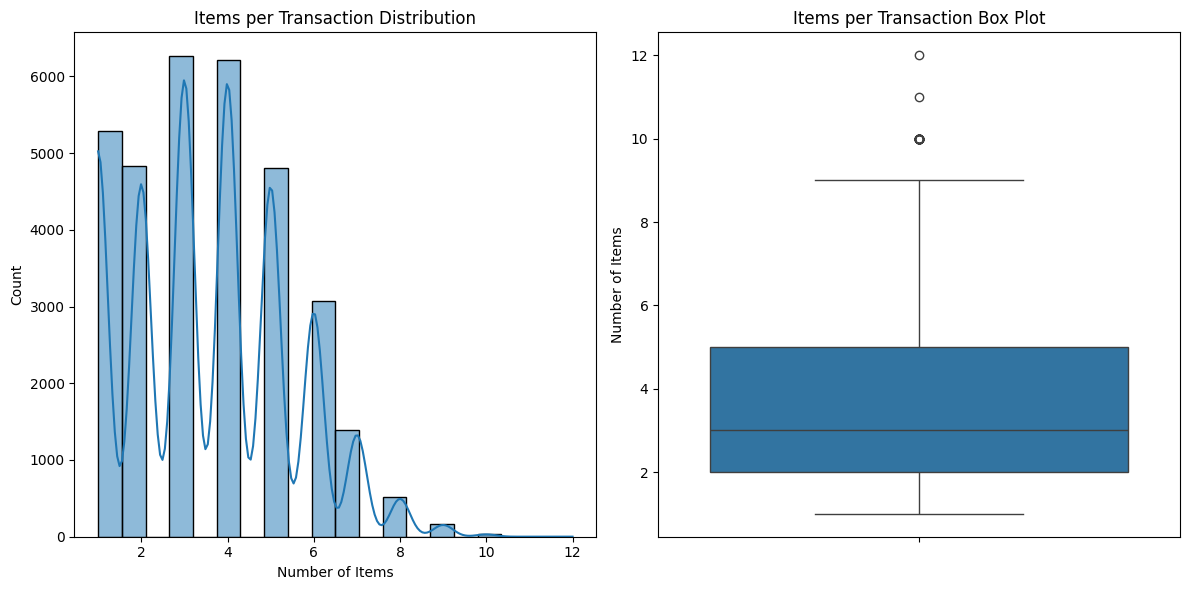

Items per Transaction Statistics:
count    32569.000000
mean         3.584144
std          1.843896
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         12.000000
dtype: float64


In [8]:
if all(entity in data and data[entity] is not None for entity in ['transactions', 'transaction_items']):
    transactions_df = data['transactions']
    transaction_items_df = data['transaction_items']
    
    # Prepare transaction date if needed
    if 'created_at' in transactions_df.columns and not pd.api.types.is_datetime64_any_dtype(transactions_df['created_at']):
        transactions_df['created_at'] = pd.to_datetime(transactions_df['created_at'])
    
    # Transactions by date
    if 'created_at' in transactions_df.columns:
        transactions_df['transaction_date'] = transactions_df['created_at'].dt.date
        daily_transactions = transactions_df.groupby('transaction_date').size()
        
        plt.figure(figsize=(14, 6))
        daily_transactions.plot()
        plt.title('Number of Transactions by Date')
        plt.xlabel('Date')
        plt.ylabel('Number of Transactions')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # Transaction amount distribution
    if 'total_amount' in transactions_df.columns:
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(transactions_df['total_amount'], bins=30, kde=True)
        plt.title('Transaction Amount Distribution')
        plt.xlabel('Amount')
        
        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=transactions_df['total_amount'])
        plt.title('Amount Box Plot')
        plt.ylabel('Amount')
        
        plt.tight_layout()
        plt.show()
        
        # Transaction amount statistics
        amount_stats = transactions_df['total_amount'].describe()
        print("Transaction Amount Statistics:")
        print(amount_stats)
    
    # Payment method distribution
    if 'payment_method' in transactions_df.columns:
        payment_counts = transactions_df['payment_method'].value_counts()
        
        plt.figure(figsize=(10, 6))
        ax = payment_counts.plot(kind='pie', autopct='%1.1f%%', cmap='tab10')
        ax.set_ylabel('')
        plt.title('Payment Method Distribution')
        plt.tight_layout()
        plt.show()
    
    # Channel distribution
    if 'channel' in transactions_df.columns:
        channel_counts = transactions_df['channel'].value_counts()
        
        plt.figure(figsize=(10, 6))
        ax = channel_counts.plot(kind='bar', color='lightblue')
        plt.title('Transaction Channel Distribution')
        plt.xlabel('Channel')
        plt.ylabel('Number of Transactions')
        plt.tight_layout()
        plt.show()
    
    # Items per transaction
    items_per_transaction = transaction_items_df.groupby('transaction_id').size()
    
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(items_per_transaction, bins=20, kde=True)
    plt.title('Items per Transaction Distribution')
    plt.xlabel('Number of Items')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=items_per_transaction)
    plt.title('Items per Transaction Box Plot')
    plt.ylabel('Number of Items')
    
    plt.tight_layout()
    plt.show()
    
    # Items per transaction statistics
    items_stats = items_per_transaction.describe()
    print("Items per Transaction Statistics:")
    print(items_stats)
else:
    print("Transaction data or transaction items data not available for analysis.")

## Customer Purchase Analysis

Let's analyze customer purchasing behavior.

In [9]:
if all(entity in data and data[entity] is not None for entity in ['customers', 'transactions']):
    customers_df = data['customers']
    transactions_df = data['transactions']
    
    # Merge data
    if 'customer_id' in transactions_df.columns:
        # Group transactions by customer
        customer_transactions = transactions_df.groupby('customer_id').agg({
            'transaction_id': 'count',
            'total_amount': 'sum',
            'created_at': ['min', 'max']
        })
        
        # Flatten column names
        customer_transactions.columns = ['transaction_count', 'total_spend', 'first_purchase', 'last_purchase']
        
        # Calculate average transaction value
        customer_transactions['avg_transaction_value'] = customer_transactions['total_spend'] / customer_transactions['transaction_count']
        
        # Calculate days since first purchase and last purchase
        if not pd.api.types.is_datetime64_any_dtype(customer_transactions['first_purchase']):
            customer_transactions['first_purchase'] = pd.to_datetime(customer_transactions['first_purchase'])
        if not pd.api.types.is_datetime64_any_dtype(customer_transactions['last_purchase']):
            customer_transactions['last_purchase'] = pd.to_datetime(customer_transactions['last_purchase'])
            
        today = pd.Timestamp.now().date()
        customer_transactions['days_since_first_purchase'] = (today - customer_transactions['first_purchase'].dt.date).dt.days
        customer_transactions['days_since_last_purchase'] = (today - customer_transactions['last_purchase'].dt.date).dt.days
        
        # Calculate purchase frequency (days between purchases)
        customer_transactions['purchase_timespan'] = (customer_transactions['last_purchase'] - customer_transactions['first_purchase']).dt.days
        customer_transactions['purchase_frequency'] = customer_transactions['purchase_timespan'] / customer_transactions['transaction_count']
        
        # Display summary statistics
        print("Customer Purchase Behavior Summary:")
        display(customer_transactions.describe())
        
        # Visualize transaction count distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(customer_transactions['transaction_count'], bins=30, kde=True)
        plt.title('Distribution of Transaction Count per Customer')
        plt.xlabel('Number of Transactions')
        plt.tight_layout()
        plt.show()
        
        # Visualize total spend distribution
        plt.figure(figsize=(12, 6))
        sns.histplot(customer_transactions['total_spend'], bins=30, kde=True)
        plt.title('Distribution of Total Spend per Customer')
        plt.xlabel('Total Spend')
        plt.tight_layout()
        plt.show()
        
        # RFM Analysis
        print("\nRFM Analysis:")
        
        # Create RFM segments
        # Recency - days since last purchase
        r_labels = ['1-30 days', '31-60 days', '61-90 days', '91-180 days', '181+ days']
        r_bins = [0, 30, 60, 90, 180, float('inf')]
        customer_transactions['recency_segment'] = pd.cut(customer_transactions['days_since_last_purchase'], bins=r_bins, labels=r_labels)
        
        # Frequency - number of transactions
        f_labels = ['1 transaction', '2-5 transactions', '6-10 transactions', '11-20 transactions', '21+ transactions']
        f_bins = [0, 1, 5, 10, 20, float('inf')]
        customer_transactions['frequency_segment'] = pd.cut(customer_transactions['transaction_count'], bins=f_bins, labels=f_labels)
        
        # Monetary - total spend
        quantiles = customer_transactions['total_spend'].quantile([0.2, 0.4, 0.6, 0.8])
        m_labels = ['Bottom 20%', '20-40%', '40-60%', '60-80%', 'Top 20%']
        m_bins = [0, quantiles[0.2], quantiles[0.4], quantiles[0.6], quantiles[0.8], float('inf')]
        customer_transactions['monetary_segment'] = pd.cut(customer_transactions['total_spend'], bins=m_bins, labels=m_labels)
        
        # Display RFM segment distributions
        rfm_segments = pd.DataFrame()
        rfm_segments['recency'] = customer_transactions['recency_segment'].value_counts()
        rfm_segments['frequency'] = customer_transactions['frequency_segment'].value_counts()
        rfm_segments['monetary'] = customer_transactions['monetary_segment'].value_counts()
        
        display(rfm_segments)
        
        # Visualize RFM segments
        plt.figure(figsize=(18, 6))
        
        plt.subplot(1, 3, 1)
        sns.barplot(x=rfm_segments.index, y=rfm_segments['recency'], palette='Blues_d')
        plt.title('Recency Segments')
        plt.xticks(rotation=45)
        plt.ylabel('Number of Customers')
        
        plt.subplot(1, 3, 2)
        sns.barplot(x=rfm_segments.index, y=rfm_segments['frequency'], palette='Greens_d')
        plt.title('Frequency Segments')
        plt.xticks(rotation=45)
        plt.ylabel('Number of Customers')
        
        plt.subplot(1, 3, 3)
        sns.barplot(x=rfm_segments.index, y=rfm_segments['monetary'], palette='Reds_d')
        plt.title('Monetary Segments')
        plt.xticks(rotation=45)
        plt.ylabel('Number of Customers')
        
        plt.tight_layout()
        plt.show()
else:
    print("Customer data or transaction data not available for analysis.")

AttributeError: Can only use .dt accessor with datetimelike values

## Product Performance Analysis

Let's analyze product performance based on transaction data.

Top 10 Products by Revenue:


,product_name,category,brand,times_sold,units_sold,total_revenue
product_id,,,,,,
290,"Moore, Leblanc and Mays light Ultra",if,"Moore, Leblanc and Mays",140,292,264927.12
117,Sanchez Group wait Ultra,easy,Sanchez Group,136,280,258738.65
786,Hobbs LLC serve Max,civil,Hobbs LLC,133,272,245436.63
475,"Moore, Gomez and Russell will Ultra",physical,"Moore, Gomez and Russell",128,263,235635.99
314,Hobbs LLC quality Lite,quality,Hobbs LLC,129,270,235461.09
173,Russo and Sons work Max,easy,Russo and Sons,145,279,233359.69
575,Yoder Inc ok Ultra,other,Yoder Inc,127,265,233089.94
970,Hobbs LLC opportunity Max,create,Hobbs LLC,138,272,230594.93
746,Sanchez Group suffer Ultra,physical,Sanchez Group,133,267,229729.77


/var/folders/n2/rj9l6sgd1k9fgdv1z9h37t2h0000gn/T/ipykernel_6665/1957236003.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='product_name', data=top_products, palette='viridis')


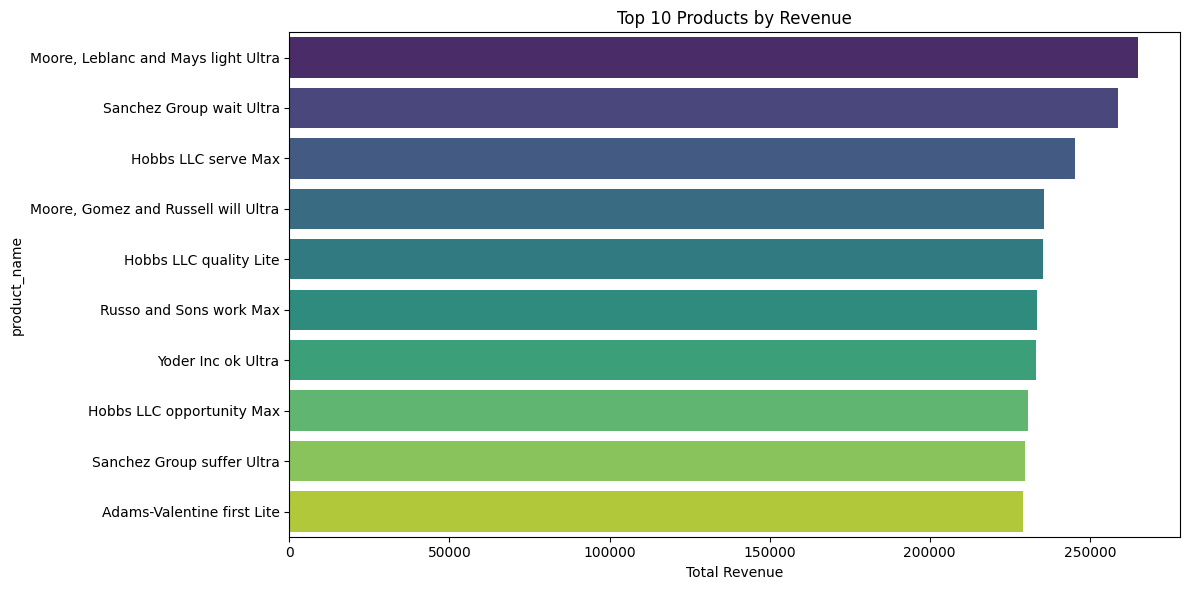


Top 10 Categories by Revenue:


,times_sold,units_sold,total_revenue
category,,,
major,9797,19655,9272213.94
way,6068,12128,6674878.60
win,6590,13152,6286266.92
other,6650,13273,6265474.00
quality,6829,13650,5456939.93
could,6447,12829,5085631.35
point,5187,10508,4723699.59
recently,6122,12167,4580350.87
practice,4377,8742,4406692.62


/var/folders/n2/rj9l6sgd1k9fgdv1z9h37t2h0000gn/T/ipykernel_6665/1957236003.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y=top_categories.index, data=top_categories, palette='plasma')


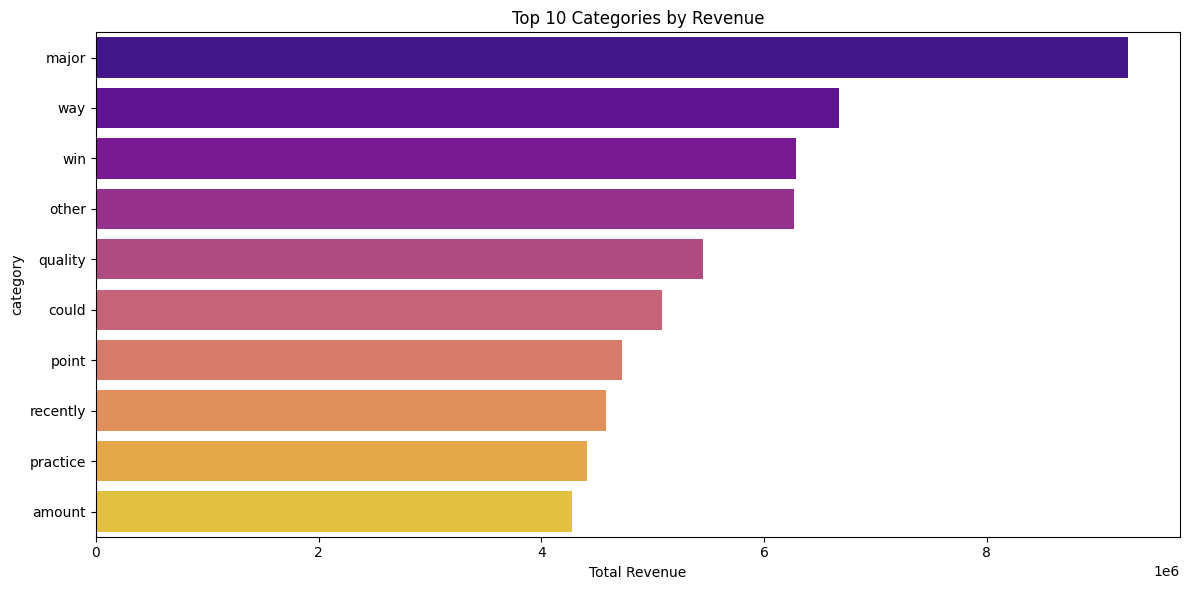


Top 10 Brands by Revenue:


,times_sold,units_sold,total_revenue
brand,,,
Hobbs LLC,2342,4687,2389998.29
"Floyd, Weeks and Robinson",1898,3847,2175556.03
"Tyler, Cohen and Freeman",1627,3317,1945942.58
Sanchez Group,2051,4062,1772653.63
Tran-Clark,1607,3189,1771937.12
"Moore, Leblanc and Mays",1736,3429,1770146.97
Thomas-Rogers,1599,3193,1717064.09
Davis-Scott,1820,3579,1688718.92
James LLC,2098,4240,1674398.17


/var/folders/n2/rj9l6sgd1k9fgdv1z9h37t2h0000gn/T/ipykernel_6665/1957236003.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y=top_brands.index, data=top_brands, palette='magma')


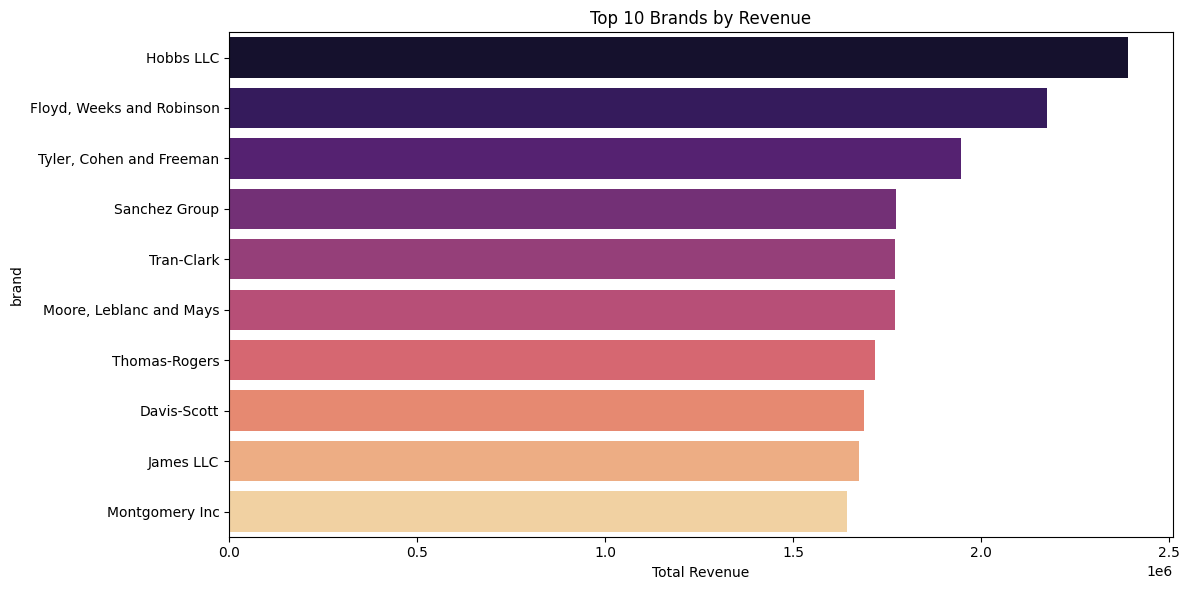


Top 10 Products by Profit Margin (with at least 5 sales):


,product_name,category,times_sold,total_revenue,total_profit,profit_margin
product_id,,,,,,
465,"Rubio, Grant and Baker military Ultra",history,118,5061.54,2886.64,0.570309
382,"Tyler, Cohen and Freeman part Pro",history,102,164517.10,93569.47,0.568752
989,James LLC hand Max,amount,139,99243.45,56229.85,0.566585
73,"Smith, Alexander and Evans article Pro",receive,109,106368.31,59842.99,0.562602
24,Hall Group national,recently,119,74471.11,41736.59,0.560440
34,Brewer Ltd pull Max,other,105,96237.31,53913.31,0.560212
420,Hartman-Booth one Max,other,100,101521.67,56864.39,0.560121
962,Leon PLC ability Pro,could,112,3434.86,1922.56,0.559720
125,Gibson-Thompson senior Pro,main,103,119574.28,66678.76,0.557635


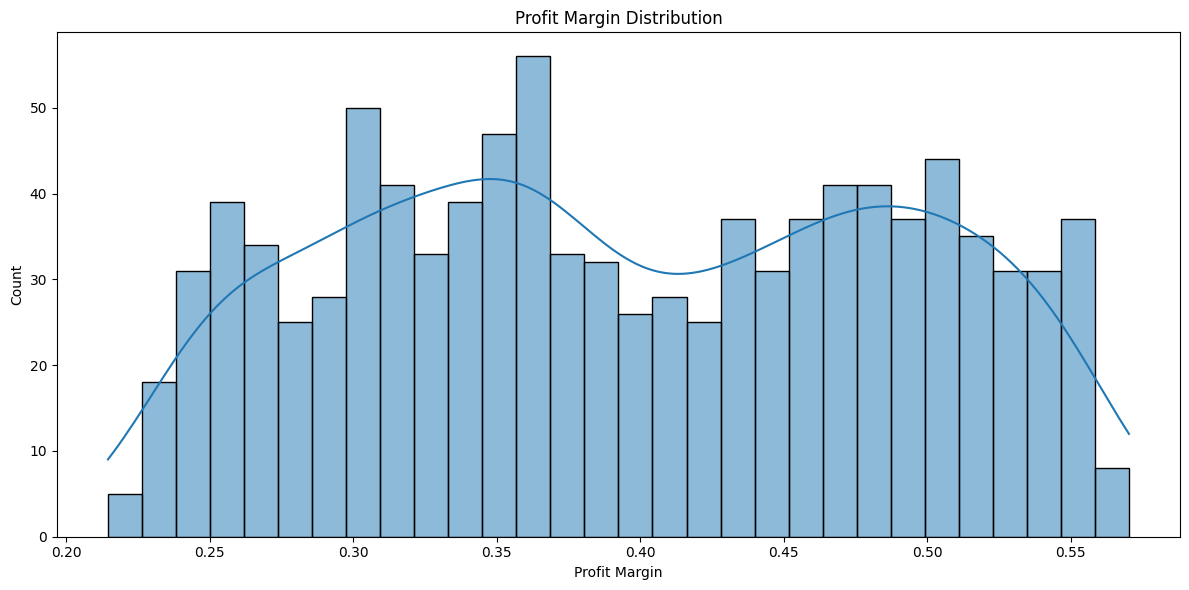

In [10]:
if all(entity in data and data[entity] is not None for entity in ['products', 'transaction_items']):
    products_df = data['products']
    transaction_items_df = data['transaction_items']
    
    # Merge product data with transaction items
    if 'product_id' in transaction_items_df.columns and 'product_id' in products_df.columns:
        # Group by product to get sales metrics
        product_sales = transaction_items_df.groupby('product_id').agg({
            'transaction_item_id': 'count',
            'quantity': 'sum',
            'line_total': 'sum'
        }).rename(columns={
            'transaction_item_id': 'times_sold',
            'quantity': 'units_sold',
            'line_total': 'total_revenue'
        })
        
        # Merge with product information
        product_performance = product_sales.join(products_df.set_index('product_id')[['product_name', 'category', 'brand', 'unit_price']])
        
        # Calculate profit (assuming we have cost_price)
        if 'cost_price' in products_df.columns:
            cost_price_map = products_df.set_index('product_id')['cost_price']
            product_performance['cost_price'] = product_performance.index.map(cost_price_map)
            product_performance['total_cost'] = product_performance['units_sold'] * product_performance['cost_price']
            product_performance['total_profit'] = product_performance['total_revenue'] - product_performance['total_cost']
            product_performance['profit_margin'] = product_performance['total_profit'] / product_performance['total_revenue']
        
        # Sort by revenue to find top performers
        top_products = product_performance.sort_values('total_revenue', ascending=False).head(10)
        
        print("Top 10 Products by Revenue:")
        display(top_products[['product_name', 'category', 'brand', 'times_sold', 'units_sold', 'total_revenue']])
        
        # Visualize top products
        plt.figure(figsize=(12, 6))
        sns.barplot(x='total_revenue', y='product_name', data=top_products, palette='viridis')
        plt.title('Top 10 Products by Revenue')
        plt.xlabel('Total Revenue')
        plt.tight_layout()
        plt.show()
        
        # Category performance
        if 'category' in product_performance.columns:
            category_performance = product_performance.groupby('category').agg({
                'times_sold': 'sum',
                'units_sold': 'sum',
                'total_revenue': 'sum'
            }).sort_values('total_revenue', ascending=False)
            
            top_categories = category_performance.head(10)
            
            print("\nTop 10 Categories by Revenue:")
            display(top_categories)
            
            # Visualize top categories
            plt.figure(figsize=(12, 6))
            sns.barplot(x='total_revenue', y=top_categories.index, data=top_categories, palette='plasma')
            plt.title('Top 10 Categories by Revenue')
            plt.xlabel('Total Revenue')
            plt.tight_layout()
            plt.show()
        
        # Brand performance
        if 'brand' in product_performance.columns:
            brand_performance = product_performance.groupby('brand').agg({
                'times_sold': 'sum',
                'units_sold': 'sum',
                'total_revenue': 'sum'
            }).sort_values('total_revenue', ascending=False)
            
            top_brands = brand_performance.head(10)
            
            print("\nTop 10 Brands by Revenue:")
            display(top_brands)
            
            # Visualize top brands
            plt.figure(figsize=(12, 6))
            sns.barplot(x='total_revenue', y=top_brands.index, data=top_brands, palette='magma')
            plt.title('Top 10 Brands by Revenue')
            plt.xlabel('Total Revenue')
            plt.tight_layout()
            plt.show()
        
        # Profit analysis if available
        if 'profit_margin' in product_performance.columns:
            # Top products by profit margin (with minimum sales threshold)
            min_sales = 5  # Minimum number of sales to consider
            top_margin_products = product_performance[product_performance['times_sold'] >= min_sales].sort_values('profit_margin', ascending=False).head(10)
            
            print(f"\nTop 10 Products by Profit Margin (with at least {min_sales} sales):")
            display(top_margin_products[['product_name', 'category', 'times_sold', 'total_revenue', 'total_profit', 'profit_margin']])
            
            # Visualize profit margin distribution
            plt.figure(figsize=(12, 6))
            sns.histplot(product_performance['profit_margin'], bins=30, kde=True)
            plt.title('Profit Margin Distribution')
            plt.xlabel('Profit Margin')
            plt.tight_layout()
            plt.show()
else:
    print("Product data or transaction items data not available for analysis.")

## Geographic Analysis

Let's analyze sales patterns by location.

Sales by Country:


,transaction_count,total_sales
country,,
Norway,674,2222031.62
Kazakhstan,633,1994145.70
New Zealand,597,1966615.15
Greenland,520,1711498.68
Jersey,528,1608871.47
Haiti,479,1546890.02
Algeria,487,1489024.54
Guernsey,430,1410009.41
Bermuda,461,1389537.93


/var/folders/n2/rj9l6sgd1k9fgdv1z9h37t2h0000gn/T/ipykernel_6665/376777810.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y='total_sales', data=top_countries, palette='Blues_d')
/var/folders/n2/rj9l6sgd1k9fgdv1z9h37t2h0000gn/T/ipykernel_6665/376777810.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y='avg_transaction_value', data=top_countries, palette='Greens_d')


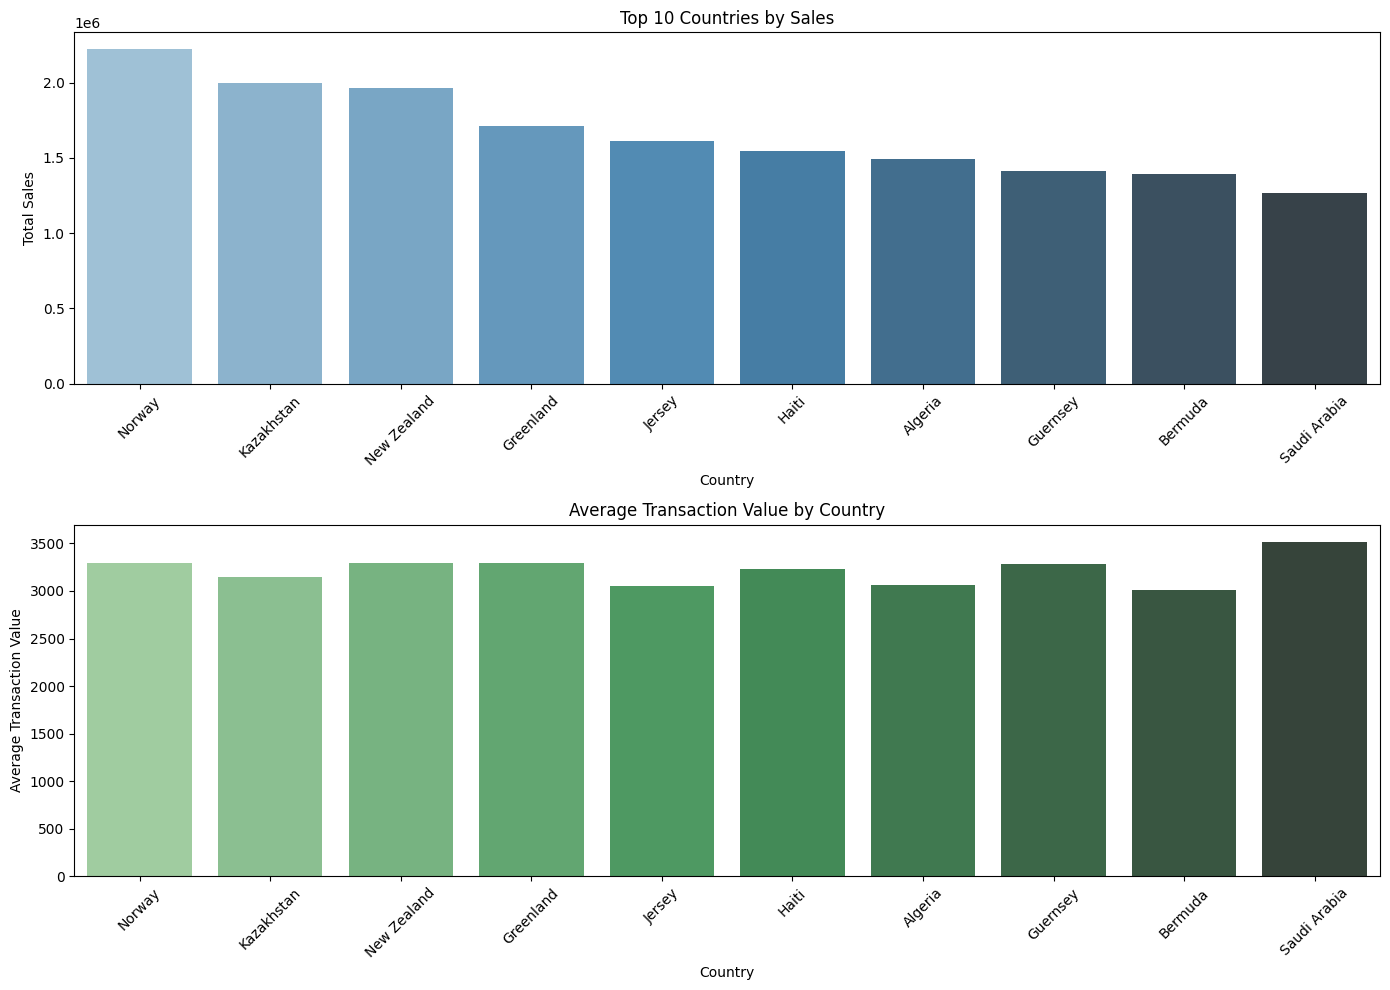


Sales by State/Region:


,,transaction_count,total_sales
country,state,,
United States Virgin Islands,VI,316,1047235.64
Denmark,VT,309,1024630.10
Italy,AR,202,689907.63
Chile,DE,195,654572.10
Syrian Arab Republic,MN,182,652087.20
Saudi Arabia,MS,183,648988.93
Seychelles,NH,190,634448.04
Norfolk Island,PA,187,634145.37
Bosnia and Herzegovina,MD,171,618160.07


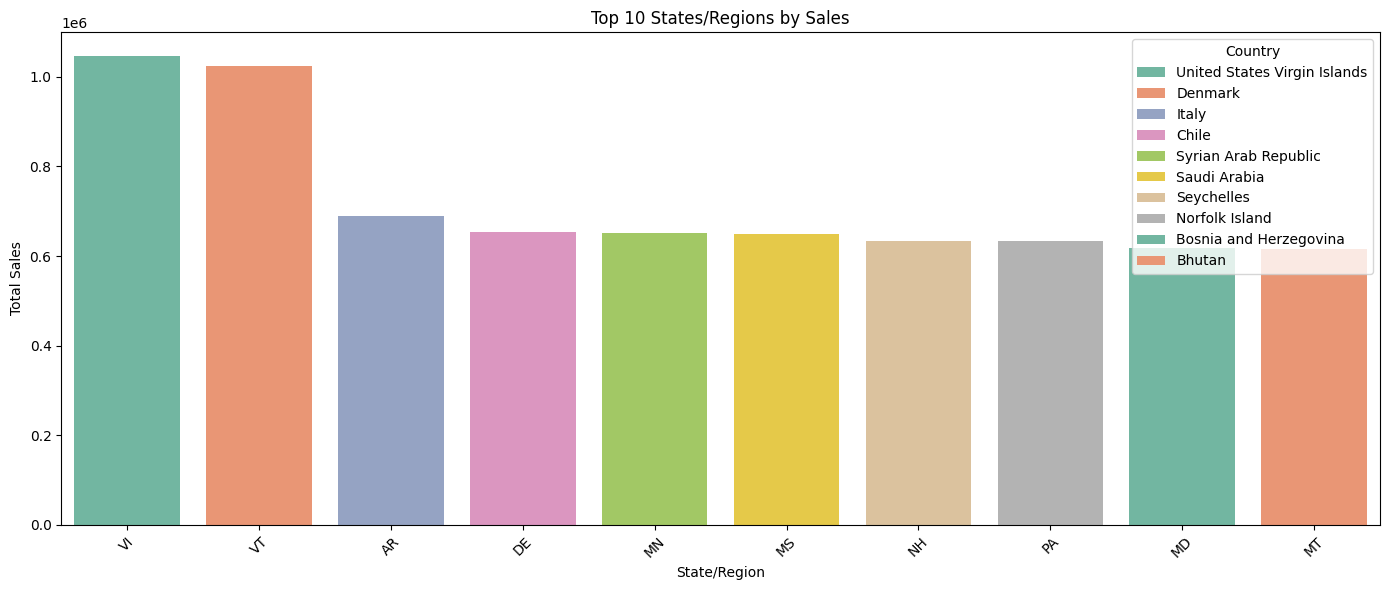

In [11]:
if all(entity in data and data[entity] is not None for entity in ['transactions', 'locations']):
    transactions_df = data['transactions']
    locations_df = data['locations']
    
    # Merge transactions with locations
    if 'location_id' in transactions_df.columns and 'location_id' in locations_df.columns:
        # Merge data
        transaction_locations = transactions_df.merge(locations_df, on='location_id')
        
        # Sales by country
        if 'country' in transaction_locations.columns and 'total_amount' in transaction_locations.columns:
            country_sales = transaction_locations.groupby('country').agg({
                'transaction_id': 'count',
                'total_amount': 'sum'
            }).rename(columns={
                'transaction_id': 'transaction_count',
                'total_amount': 'total_sales'
            }).sort_values('total_sales', ascending=False)
            
            print("Sales by Country:")
            display(country_sales.head(10))
            
            # Calculate average transaction value by country
            country_sales['avg_transaction_value'] = country_sales['total_sales'] / country_sales['transaction_count']
            
            # Visualize top countries by sales
            top_countries = country_sales.head(10)
            
            plt.figure(figsize=(14, 10))
            
            plt.subplot(2, 1, 1)
            sns.barplot(x=top_countries.index, y='total_sales', data=top_countries, palette='Blues_d')
            plt.title('Top 10 Countries by Sales')
            plt.xlabel('Country')
            plt.ylabel('Total Sales')
            plt.xticks(rotation=45)
            
            plt.subplot(2, 1, 2)
            sns.barplot(x=top_countries.index, y='avg_transaction_value', data=top_countries, palette='Greens_d')
            plt.title('Average Transaction Value by Country')
            plt.xlabel('Country')
            plt.ylabel('Average Transaction Value')
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.show()
        
        # Sales by state/region
        if 'state' in transaction_locations.columns and 'total_amount' in transaction_locations.columns:
            # Group by country and state for more meaningful analysis
            state_sales = transaction_locations.groupby(['country', 'state']).agg({
                'transaction_id': 'count',
                'total_amount': 'sum'
            }).rename(columns={
                'transaction_id': 'transaction_count',
                'total_amount': 'total_sales'
            }).sort_values('total_sales', ascending=False)
            
            print("\nSales by State/Region:")
            display(state_sales.head(10))
            
            # For visualization, get top states overall
            top_states = state_sales.head(10).reset_index()
            
            plt.figure(figsize=(14, 6))
            sns.barplot(x='state', y='total_sales', hue='country', data=top_states, palette='Set2')
            plt.title('Top 10 States/Regions by Sales')
            plt.xlabel('State/Region')
            plt.ylabel('Total Sales')
            plt.xticks(rotation=45)
            plt.legend(title='Country')
            plt.tight_layout()
            plt.show()
else:
    print("Transaction data or location data not available for analysis.")

## Time-Based Analysis

Let's analyze sales patterns over time.

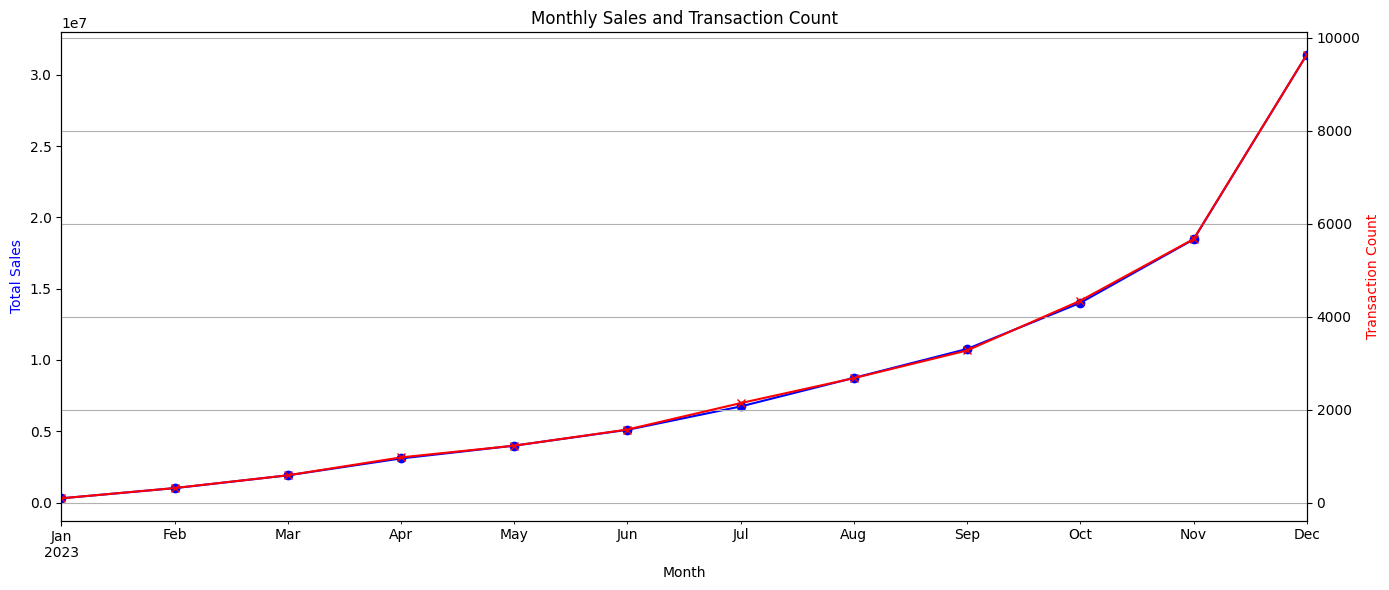

/var/folders/n2/rj9l6sgd1k9fgdv1z9h37t2h0000gn/T/ipykernel_6665/2561637617.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sales.index, y='total_sales', data=daily_sales, palette='Blues_d')
/var/folders/n2/rj9l6sgd1k9fgdv1z9h37t2h0000gn/T/ipykernel_6665/2561637617.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sales.index, y='transaction_count', data=daily_sales, palette='Greens_d')


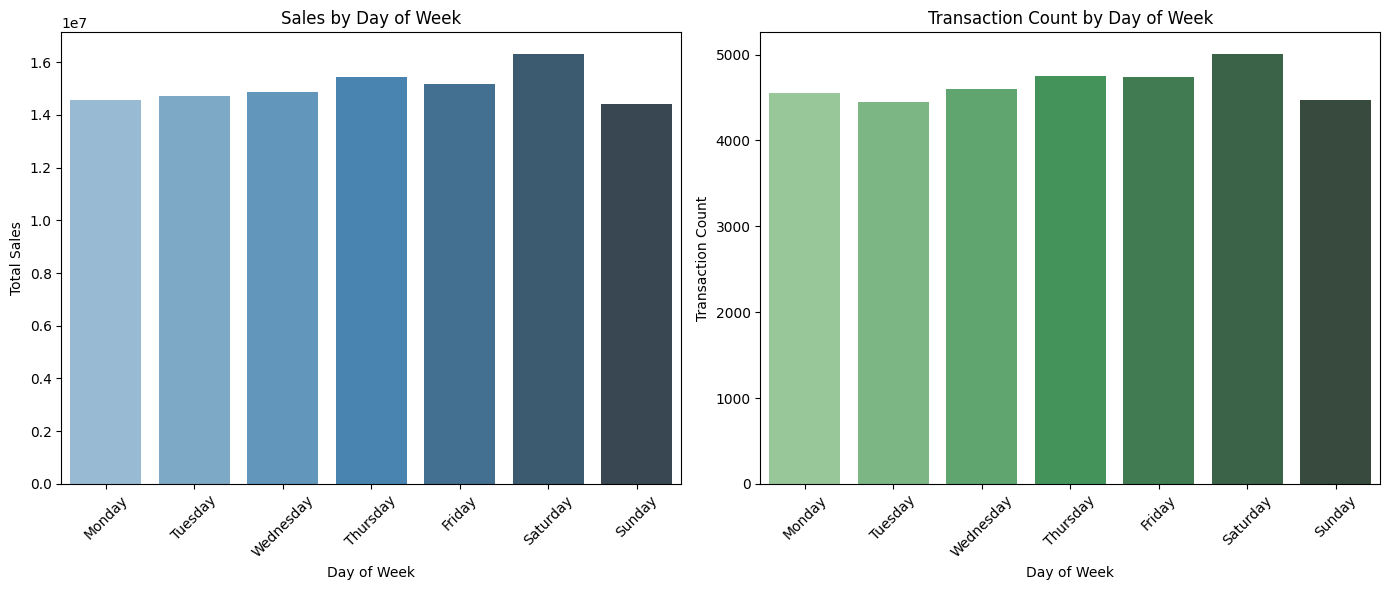

/var/folders/n2/rj9l6sgd1k9fgdv1z9h37t2h0000gn/T/ipykernel_6665/2561637617.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_sales.index, y='total_sales', data=hourly_sales, palette='Blues_d')
/var/folders/n2/rj9l6sgd1k9fgdv1z9h37t2h0000gn/T/ipykernel_6665/2561637617.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_sales.index, y='transaction_count', data=hourly_sales, palette='Greens_d')


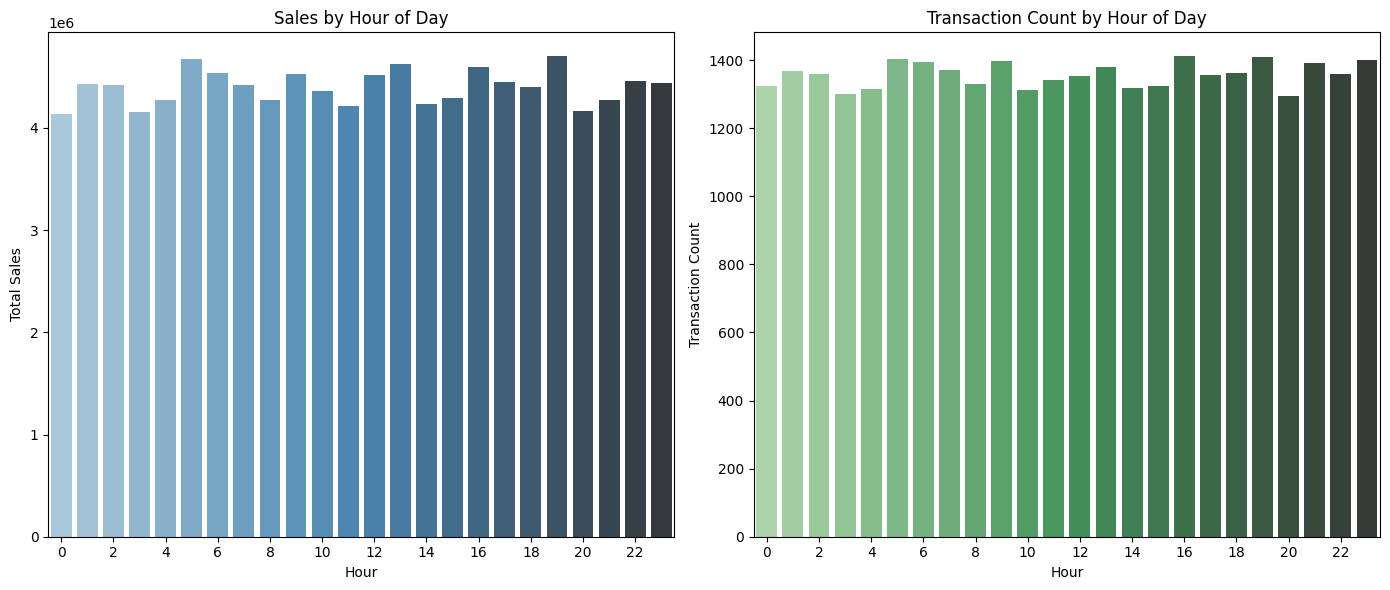

In [12]:
if 'transactions' in data and data['transactions'] is not None:
    transactions_df = data['transactions']
    
    # Ensure transaction date is in datetime format
    if 'created_at' in transactions_df.columns:
        if not pd.api.types.is_datetime64_any_dtype(transactions_df['created_at']):
            transactions_df['created_at'] = pd.to_datetime(transactions_df['created_at'])
        
        # Create time-based fields
        transactions_df['date'] = transactions_df['created_at'].dt.date
        transactions_df['month'] = transactions_df['created_at'].dt.to_period('M')
        transactions_df['day_of_week'] = transactions_df['created_at'].dt.day_name()
        transactions_df['hour'] = transactions_df['created_at'].dt.hour
        
        # Sales by month
        monthly_sales = transactions_df.groupby('month').agg({
            'transaction_id': 'count',
            'total_amount': 'sum'
        }).rename(columns={
            'transaction_id': 'transaction_count',
            'total_amount': 'total_sales'
        })
        
        # Plot monthly sales trend
        plt.figure(figsize=(14, 6))
        ax = monthly_sales['total_sales'].plot(color='blue', marker='o')
        ax2 = ax.twinx()
        monthly_sales['transaction_count'].plot(color='red', marker='x', ax=ax2)
        ax.set_xlabel('Month')
        ax.set_ylabel('Total Sales', color='blue')
        ax2.set_ylabel('Transaction Count', color='red')
        plt.title('Monthly Sales and Transaction Count')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Sales by day of week
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_sales = transactions_df.groupby('day_of_week').agg({
            'transaction_id': 'count',
            'total_amount': 'sum'
        }).rename(columns={
            'transaction_id': 'transaction_count',
            'total_amount': 'total_sales'
        }).reindex(day_order)
        
        # Plot sales by day of week
        plt.figure(figsize=(14, 6))
        
        plt.subplot(1, 2, 1)
        sns.barplot(x=daily_sales.index, y='total_sales', data=daily_sales, palette='Blues_d')
        plt.title('Sales by Day of Week')
        plt.xlabel('Day of Week')
        plt.ylabel('Total Sales')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 2, 2)
        sns.barplot(x=daily_sales.index, y='transaction_count', data=daily_sales, palette='Greens_d')
        plt.title('Transaction Count by Day of Week')
        plt.xlabel('Day of Week')
        plt.ylabel('Transaction Count')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Sales by hour of day
        hourly_sales = transactions_df.groupby('hour').agg({
            'transaction_id': 'count',
            'total_amount': 'sum'
        }).rename(columns={
            'transaction_id': 'transaction_count',
            'total_amount': 'total_sales'
        })
        
        # Plot sales by hour
        plt.figure(figsize=(14, 6))
        
        plt.subplot(1, 2, 1)
        sns.barplot(x=hourly_sales.index, y='total_sales', data=hourly_sales, palette='Blues_d')
        plt.title('Sales by Hour of Day')
        plt.xlabel('Hour')
        plt.ylabel('Total Sales')
        plt.xticks(range(0, 24, 2))
        
        plt.subplot(1, 2, 2)
        sns.barplot(x=hourly_sales.index, y='transaction_count', data=hourly_sales, palette='Greens_d')
        plt.title('Transaction Count by Hour of Day')
        plt.xlabel('Hour')
        plt.ylabel('Transaction Count')
        plt.xticks(range(0, 24, 2))
        
        plt.tight_layout()
        plt.show()
else:
    print("Transaction data not available for analysis.")

## Conclusion and Next Steps

This exploratory data analysis has provided valuable insights into our retail data. Key findings include:

1. **Customer Behavior**: We've identified customer segments based on recency, frequency, and monetary value (RFM analysis).

2. **Product Performance**: We've identified top-performing products, categories, and brands by revenue and profit margin.

3. **Geographic Patterns**: We've analyzed sales patterns across different locations to identify high-value markets.

4. **Temporal Patterns**: We've discovered sales trends by month, day of week, and hour of day.

### Next Steps:

1. **Feature Engineering**: Based on these insights, we can create features for our machine learning models, such as:
   - RFM scores for customer segmentation
   - Product popularity and profitability metrics
   - Seasonal indicators for demand forecasting

2. **Data Preprocessing**: Address any data quality issues identified during analysis:
   - Handle missing values
   - Standardize categorical variables
   - Create appropriate date/time features

3. **Advanced Analytics**: Develop more sophisticated analyses:
   - Market basket analysis to identify product associations
   - Customer lifetime value prediction
   - Churn risk identification
   - Price elasticity modeling

4. **Model Development**: Begin building machine learning models for:
   - Customer segmentation
   - Product recommendation
   - Demand forecasting
   
5. **Dashboard Development**: Create interactive dashboards for key metrics and insights.